<font size="7"><span style="color:green">Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import AdaBoostClassifier 
    # NOTA
    # para el AdaBoost hay que probar diferentes max_depth del DecisionTreeClassifier para ver cuál es el mejor

import xgboost
    # NOTA
    # xgboost.XGBRFClassifier En cada secuencia tiene un RandomForest
    # xgboost.XGBClassifier sin RandomForest

# ------------------

# Pipeline
from sklearn.pipeline import Pipeline
    # NOTA
    # Hay que poner las etiquetas automáticamente. El otro es 'from sklearn.pipeline import make_pipeline'

# ------------------

# Métricas de validación
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
# ------------------

# GridSearch
from sklearn.model_selection import GridSearchCV

# ------------------

# Balanceo
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# ------------------

# Otras
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


# SEED
seed=45

# LECTURA CSV
vinos = pd.read_csv('data/winequalityN.csv')


--------
<font size="8"><span style="color:red">BLANCO

Value Counts  1    0.665298
0    0.334702
Name: apto, dtype: float64


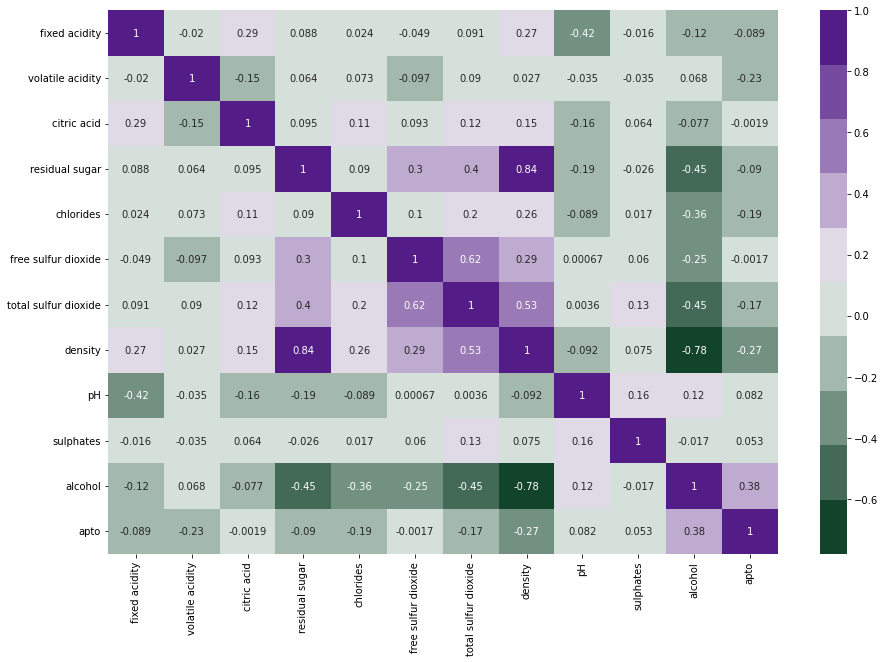

In [2]:
blanco=vinos[vinos['type']=='white'].reset_index()
blanco = blanco.drop(['index', 'type'], axis=1)

blanco = blanco.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}
blanco['apto']= blanco['quality'].map(my_dict)
blanco = blanco.drop(['quality'], axis=1)

print('Value Counts ', blanco['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(blanco.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

In [3]:
# FILTRADO
# X = blanco[['fixed acidity','volatile acidity', 'citric acid','residual sugar', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
# y = blanco['apto']


In [9]:
X = blanco.iloc[:,:-1]
y = blanco['apto']

In [4]:
# print('Value Counts X ', X.value_counts(normalize=True))
print('Value Counts y ', y.value_counts(normalize=True))

Value Counts y  1    0.665298
0    0.334702
Name: apto, dtype: float64


In [19]:
# Balanceo ROS
ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2,stratify=y_ros, random_state=seed)

In [18]:

print(X_ros.shape)
print(y_ros.shape)


(6480, 11)
(6480,)


In [21]:
# Balanceo RUS
# rus = RandomUnderSampler(random_state=seed)
# X_rus, y_rus = rus.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_rus, y_rus, test_size=0.2, random_state=seed)

In [25]:
# Balanceo SMOTE
# smote = SMOTE(random_state=seed)
# X_smote, y_smote = smote.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=seed)

In [33]:
# Balanceo SMOTETomek
# smoteT = SMOTE(random_state=seed)
# X_smoteT, y_smoteT = smoteT.fit_resample(X, y)

# X_train, X_test, y_train, y_test = train_test_split(X_smoteT, y_smoteT, test_size=0.2, random_state=seed)

Best model. Best Score 0.8576388888888888 
 --------------------------------------------------
Best model. Best Params {'classifier': GradientBoostingClassifier(learning_rate=0.2, max_depth=5, n_estimators=445), 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 445, 'kbest__k': 11} 
 --------------------------------------------------
Accuracy Score 0.9120370370370371 
 --------------------------------------------------
Confusion Matrix 
 [[625  23]
 [ 91 557]] 
 --------------------------------------------------


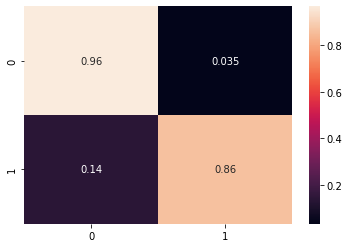

In [24]:


pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

# svm_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [SVC()],
#               'classifier__C': [0.5,0.8,1],
#               'classifier__kernel': ['linear','rbf','sigmoid']
# }

# log_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [LogisticRegression()],
#               'classifier__penalty': ['l1','l2'],
#               'classifier__C': np.logspace(0,2,5)
# }

# knn_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [KNeighborsClassifier()],
#               'classifier__n_neighbors': [5,10,12,17,20],
#               'classifier__weights': ['uniform','distance']
# }

# rf_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [RandomForestClassifier()],
#               'classifier__n_estimators': [50,100,150],
#               'classifier__max_depth': [2,3,4,5,6,7],
#               'classifier__min_samples_leaf': [1,3,5]
# }

gb_params = {'kbest__k': [8,9,10,11],
              'classifier': [GradientBoostingClassifier()],
            #   'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__max_depth': [5],
              'classifier__n_estimators': [43,440,445,450],
              'classifier__learning_rate': [0.1,0.15,0.2,0.25]
}
# ------------------------------------------------------------------------------------------------------

#1 Accuracy Score 0.9012345679012346  Sin STRATIFY
# 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 425, 'kbest__k': 11} 

#2 Accuracy Score 0.9097222222222222  CON stRATIFY
# 'classifier__learning_rate': 0.15, 'classifier__max_depth': 5, 'classifier__n_estimators': 450, 'kbest__k': 11} 

#3 Accuracy Score 0.9128086419753086 CON stRATIFY MEJOOOOOOR
# 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 440, 'kbest__k': 11}

#4 Accuracy Score 0.9112654320987654 
# 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 450, 'kbest__k': 11}

#5  Accuracy Score 0.9104938271604939 
# 'classifier__learning_rate': 0.1, 'classifier__max_depth': 5, 'classifier__n_estimators': 440, 'kbest__k': 11} 

#6 Accuracy Score 0.9120370370370371 
# 'classifier__learning_rate': 0.2, 'classifier__max_depth': 5, 'classifier__n_estimators': 445, 'kbest__k': 11}
# ---------------------------------------------------------------------------------------

# ada_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [AdaBoostClassifier()],
#               'classifier__n_estimators': [150,200,300,350],
#               'classifier__learning_rate': [0.3,0.5,0.7,1]
# }

# xgb_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [xgboost.XGBRFClassifier()],
#               'classifier__n_estimators': [175,200,225],
#               'classifier__learning_rate': [0.01,0.02,0.03,0.05]
# }

# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]
search_space = [gb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

-----

--------
<font size="8"><span style="color:red">TINTO

Value Counts  1    0.534212
0    0.465788
Name: apto, dtype: float64


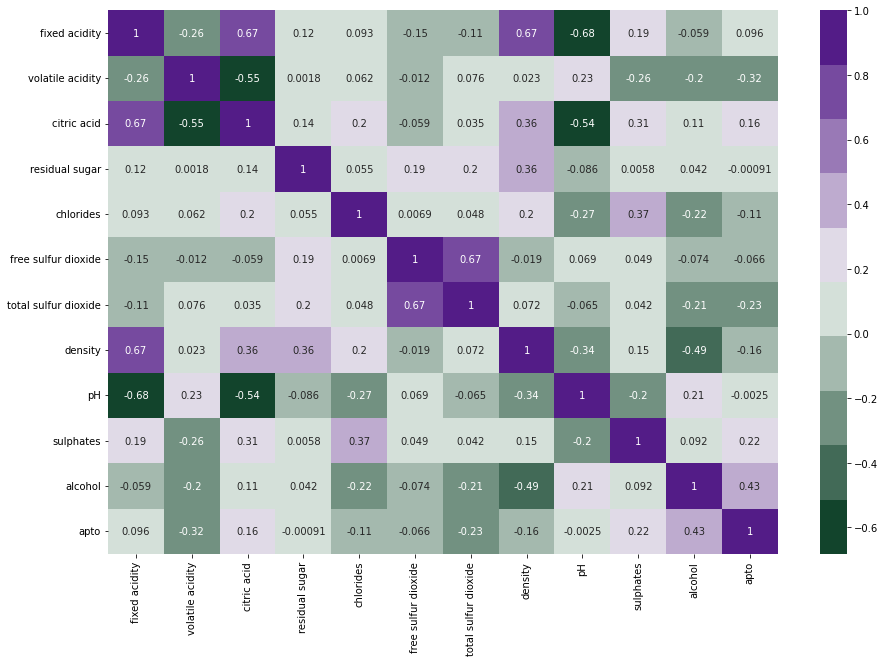

In [2]:
tinto=vinos[vinos['type']=='red'].reset_index()
tinto = tinto.drop(['index', 'type'], axis=1)

tinto = tinto.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1}
tinto['apto']= tinto['quality'].map(my_dict)
tinto = tinto.drop(['quality'], axis=1)

print('Value Counts ', tinto['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(tinto.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

In [3]:
# X = tinto.iloc[:,:-1]
# y = tinto['apto']

In [8]:
X = tinto[['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
y = tinto['apto']

In [9]:
# Balanceo ROS
ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)

Best model. Best Score 0.7979451721757057 
 --------------------------------------------------
Best model. Best Params {'classifier': KNeighborsClassifier(n_neighbors=20, weights='distance'), 'classifier__n_neighbors': 20, 'classifier__weights': 'distance', 'kbest__k': 5} 
 --------------------------------------------------
Accuracy Score 0.8240469208211144 
 --------------------------------------------------
Confusion Matrix 
 [[144  19]
 [ 41 137]] 
 --------------------------------------------------


c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1518 fits failed out of a total of 2232.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
372 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Yo\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipelin

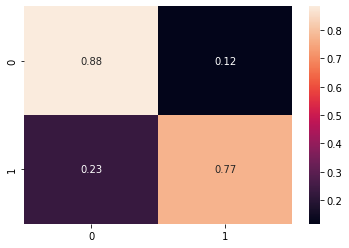

In [10]:
pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

svm_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [SVC()],
              'classifier__C': [0.5,0.8,1],
              'classifier__kernel': ['linear','rbf','sigmoid']
}

log_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [LogisticRegression()],
              'classifier__penalty': ['l1','l2'],
              'classifier__C': np.logspace(0,2,5)
}

knn_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [5,10,12,14,16,17,20],
              'classifier__weights': ['uniform','distance']
}
 
rf_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [RandomForestClassifier()],
              'classifier__n_estimators': [50,100,150],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__min_samples_leaf': [1,3,5]
}

gb_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__n_estimators': [367,400,450],
              'classifier__learning_rate': [0.2,0.5,0.7]
}

ada_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [AdaBoostClassifier()],
              'classifier__n_estimators': [150,200,300,350],
              'classifier__learning_rate': [0.3,0.5,0.7,1]
}

xgb_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [xgboost.XGBRFClassifier()],
              'classifier__n_estimators': [175,200,225],
              'classifier__learning_rate': [0.01,0.02,0.03,0.05]
}

search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);

--------
<font size="8"><span style="color:red">JUNTOS


Value Counts  1    0.632988
0    0.367012
Name: apto, dtype: float64


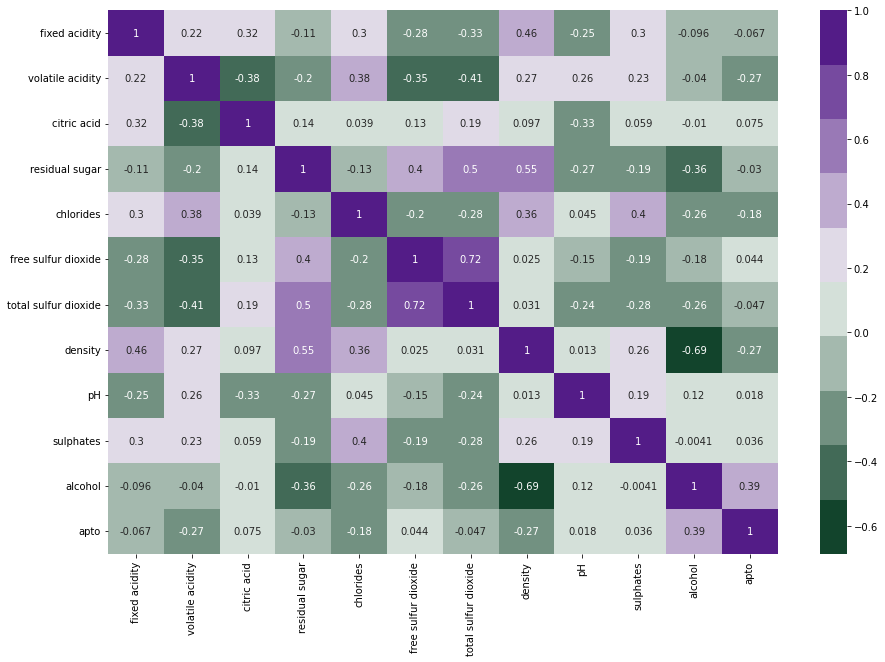

In [11]:
vinos = vinos.dropna()

my_dict={3:0, 4:0, 5:0,
        6:1, 7:1, 8:1, 9:1}
vinos['apto']= vinos['quality'].map(my_dict)
vinos = vinos.drop(['quality'], axis=1)

print('Value Counts ', vinos['apto'].value_counts(normalize=True))

plt.figure(figsize=(15,10))
sns.heatmap(vinos.corr(),cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10), annot=True);

In [ ]:
# X = vinos[['volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'pH','sulphates','alcohol']]
# y = vinos['apto']

In [17]:
X = vinos.iloc[:,1:-1]
y = vinos['apto']

In [19]:
# Balanceo ROS
ros = RandomOverSampler(random_state=seed)
X_ros, y_ros = ros.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)

In [23]:

pipe = Pipeline(steps=[('scaler', StandardScaler()),
                       ('kbest', SelectKBest()),
                       ('classifier', LogisticRegression(random_state=seed))])

# svm_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [SVC()],
#               'classifier__C': [0.5,0.8,1],
#               'classifier__kernel': ['linear','rbf','sigmoid']
# }

# log_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [LogisticRegression()],
#               'classifier__penalty': ['l1','l2'],
#               'classifier__C': np.logspace(0,2,5)
# }

# knn_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [KNeighborsClassifier()],
#               'classifier__n_neighbors': [5,10,12,17,20],
#               'classifier__weights': ['uniform','distance']
# }

# rf_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [RandomForestClassifier()],
#               'classifier__n_estimators': [50,100,150],
#               'classifier__max_depth': [2,3,4,5,6,7],
#               'classifier__min_samples_leaf': [1,3,5]
# }

gb_params = {'kbest__k': [5,7,8,9,10,11],
              'classifier': [GradientBoostingClassifier()],
              'classifier__max_depth': [2,3,4,5,6,7],
              'classifier__n_estimators': [367,390,400,410],
              'classifier__learning_rate': [0.2,0.4,0.5,0.6,0.7]
}

# 'classifier__learning_rate': 0.5, 'classifier__n_estimators': 400, 'kbest__k': 10}

# ada_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [AdaBoostClassifier()],
#               'classifier__n_estimators': [150,200,300,350],
#               'classifier__learning_rate': [0.3,0.5,0.7,1]
# }

# xgb_params = {'kbest__k': [5,7,8,9,10,11],
#               'classifier': [xgboost.XGBRFClassifier()],
#               'classifier__n_estimators': [175,200,225],
#               'classifier__learning_rate': [0.01,0.02,0.03,0.05]
# }

# search_space = [svm_params, log_params, knn_params, rf_params, gb_params, ada_params, xgb_params]
search_space = [gb_params]

clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=3, n_jobs=-1)
best_model = clf.fit(X_train, y_train)

y_pred = best_model.best_estimator_.predict(X_test)

print('Best model. Best Score', best_model.best_score_, '\n','-'*50)
print('Best model. Best Params', best_model.best_params_, '\n','-'*50)
print('Accuracy Score', accuracy_score(y_test, y_pred), '\n','-'*50)
print('Confusion Matrix \n', confusion_matrix(y_test,y_pred), '\n','-'*50)
sns.heatmap(confusion_matrix(y_test,y_pred, normalize='true'), annot=True);


KeyboardInterrupt: 

<font size="6"><span style="color:orange">PRUEBA GridSearch con Scaler y stratify=y

Con menos variables

strtify para conservar los mismos balances de la target